In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras

from keras.utils import np_utils
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
import os
print(os.listdir("C:/Users/thanawin/Desktop/Deep/detect/train"))


# Any results you write to the current directory are saved as output

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.datasets import make_classification
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

['anger', 'disgust', 'fear', 'hapiness', 'neutral', 'sad', 'surprise']


In [2]:
# import the necessary packages
# from pyimagesearch.smallvggnet import SmallVGGNet   # "smallvggnet.py" file is in "pyimagesearch" folder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from imutils import paths
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import pickle
import cv2
import os
import warnings
warnings.filterwarnings("ignore")

In [3]:
data_path = 'C:/Users/thanawin/Desktop/Deep/detect/train'
data_dir_list = os.listdir(data_path)

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(48,48))
        img_data_list.append(input_img_resize)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-disgust

Loaded the images of dataset-fear

Loaded the images of dataset-hapiness

Loaded the images of dataset-neutral

Loaded the images of dataset-sad

Loaded the images of dataset-surprise



(20451, 48, 48, 3)

In [4]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:3896]=0 #3897 0 - 3896
labels[3897:6435]=1 #2538 6435
labels[6436:8752]=2 #2317 8752
labels[8753:11830]=3 #3078 11830
labels[11831:14307]=4 #2477 14307
labels[14308:16991]=5 #2684 16991
labels[16992:20451]=6 #3460 20451

names = ['anger','contempt','disgust','fear','happy','sadness','surprise']

def getLabel(id):
    return ['anger','contempt','disgust','fear','happy','sadness','surprise'][id]

In [5]:
Y = np_utils.to_categorical(labels, num_classes)
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
x_test=X_test

In [6]:
def create_model():
    input_shape=(48,48,3)

    model = Sequential()
    model.add(Conv2D(6, (5, 5), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (5, 5), padding='same', activation = 'relu'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation = 'softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='RMSprop')
    
    return model

In [7]:
model_custom = create_model()
model_custom.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 6)         456       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2416      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        9280      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model_custom, to_file='model.png')

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [9]:
from sklearn.model_selection import KFold

In [10]:
kf = KFold(n_splits=5, shuffle=False)

In [11]:

aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [12]:
BS = 8
EPOCHS = 200
result = []
scores_loss = []
scores_acc = []
k_no = 0
for train_index, test_index in kf.split(x):
    X_Train_ = x[train_index]
    Y_Train = y[train_index]
    X_Test_ = x[test_index]
    Y_Test = y[test_index]

    file_path = r"C:\Users\thanawin\Desktop\Deep\best_weight\weight_"+str(k_no)+".hdf5"
    checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=0, save_best_only=True, mode='min')
    early = EarlyStopping(monitor="loss", mode="min", patience=8)

    callbacks_list = [checkpoint, early]

    model = create_model()
    hist = model.fit_generator(aug.flow(X_Train_, Y_Train), epochs=EPOCHS,validation_data=(X_Test_, Y_Test), callbacks=callbacks_list, verbose=0)
    # model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs, validation_data=(X_Test, Y_Test), verbose=1)
    model.load_weights(file_path)
    result.append(model.predict(X_Test_))
    score = model.evaluate(X_Test_,Y_Test, verbose=0)
    scores_loss.append(score[0])
    scores_acc.append(score[1])
    k_no+=1

In [13]:
print(scores_acc,scores_loss)

[0.5844537019729614, 0.5838630795478821, 0.5951099991798401, 0.6009780168533325, 0.609046459197998] [1.118520975112915, 1.164604902267456, 1.132690668106079, 1.0881534814834595, 1.0654174089431763]


In [14]:
value_min = min(scores_loss)
value_index = scores_loss.index(value_min)
print(value_index)

4


In [15]:
model.load_weights(r"C:\Users\thanawin\Desktop\Deep\best_weight\weight_"+str(value_index)+".hdf5")

In [16]:
best_model = model

#Evaluating model¶


In [17]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
predictions = (model.predict(x_test) > 0.5).astype("int32")

In [18]:
test_image = X_test[0:1]
print (test_image.shape)

print(best_model.predict(test_image))
print(np.argmax(best_model.predict(test_image), axis=1))
print(y_test[0:1])

#predict
y_pred = best_model.predict(X_test)

(1, 48, 48, 3)
[[0.03340196 0.01201571 0.01851355 0.01300049 0.85448724 0.05275362
  0.01582748]]
[4]
[[0. 0. 0. 0. 1. 0. 0.]]


#Visualizing Train,Test--->Accuracy,Loss

<Figure size 432x288 with 0 Axes>

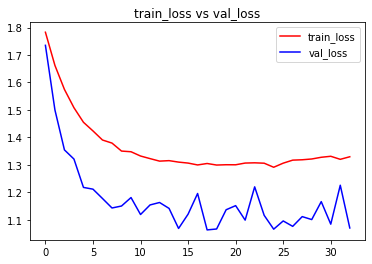

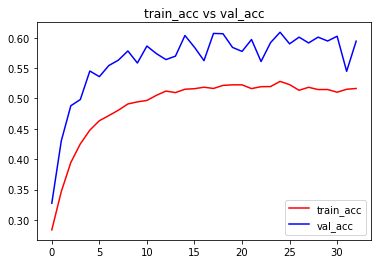

<Figure size 432x288 with 0 Axes>

In [19]:
# visualizing losses and accuracy
%matplotlib inline

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

epochs = range(len(train_acc))

plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.legend()
plt.figure()

In [22]:
#Model Save
best_model.save_weights('model_weights.h5')
best_model.save('model_keras.h5')

#Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix
results = np.argmax(best_model.predict(X_test), axis=-1)
cm = confusion_matrix(np.where(y_test == 1)[1], results)
#cm = cm.astype(np.float) / cm.sum(axis=1)[:, np.newaxis]


In [24]:
import seaborn as sns
import pandas as pd

In [25]:
label_mapdisgust = ['anger','contempt','disgust','fear','happy','sadness','surprise']

In [26]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

In [27]:
final_cm = cm_df

In [28]:
final_cm

,anger,contempt,disgust,fear,happy,sadness,surprise
anger,447,73,28,54,42,98,61
contempt,99,275,12,36,23,42,16
disgust,86,14,109,24,16,47,182
fear,6,6,4,526,22,17,10
happy,55,19,2,51,271,43,13
sadness,124,30,22,26,50,270,34
surprise,24,2,43,17,9,18,593


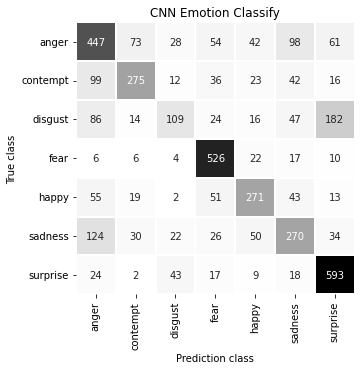

In [29]:
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()

#ROC Curve

In [30]:
from sklearn.metrics import roc_curve,auc
from itertools import cycle

In [31]:
new_label = ['anger','contempt','disgust','fear','happy','sadness','surprise']
final_label = new_label
new_class = 7

In [32]:
#ravel flatten the array into single vector
y_pred_ravel = y_pred.ravel()
lw = 2

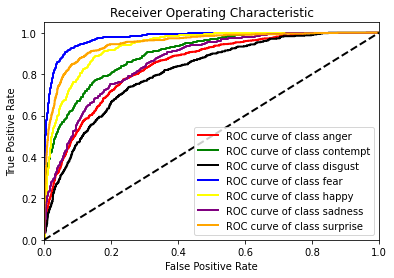

In [33]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(new_class):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
#colors = cycle(['red', 'green','black'])
colors = cycle(['red', 'green','black','blue', 'yellow','purple','orange'])
for i, color in zip(range(new_class), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}'''.format(final_label[i]))
    

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()